In [1]:
%run -i '../header.py'

In [2]:
def asympRead(particle, cutoff, cfgname, prefix): 
    return pd.concat([pd.read_csv("output/{}.{}/data/{}/asymp-{:g}.dat".format(prefix, cfgname, particle, cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)\
          ,pd.read_csv("output/{}.{}/data/{}/minE.dat".format(prefix, cfgname, particle), header=None, names=["cutscale", "E"], index_col=0)

In [3]:
def plotParticle(ax, pname, cfgname, prefix, window=[-np.inf, np.inf]):
    config = json.load(open("output/"+prefix+"."+cfgname+"/config"), object_pairs_hook = OrderedDict)
    data, peaks = asympRead(pname, config[pname]["cutscales"], cfgname, prefix)
    plotData = data.loc[(data.index > window[0]) & (data.index < window[1])].plot(marker="o", ls="", logy=True, ax=ax)
    ax.set_xlabel("M, [$GeV$]")
    ax.set_ylabel(r'$C_+, [GeV^{\frac{1}{2}}]$')
    ax.set_title("${}$({:.3f})".format(code2name(pname), 2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0]))
    ticks = ax.get_xticks()
    ticks = ["{:.3f}".format(2*config[pname]["eq"]["env"]["mC"]+t) for t in ticks]
    ax.set_xticklabels(ticks)
    for line in ax.get_lines():
        color = line._get_markerfacecolor()
        pos = line.get_label()
        plotData.axvline(peaks.loc[float(pos)][0], ls="--", color=color)

In [4]:
def doPlots(cfgname, prefix, window=None):
    config = json.load(open("output/" + prefix+"."+cfgname+"/config"), object_pairs_hook=OrderedDict)
    fig, axes = plt.subplots(len(config), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(config)))
    for i,pname in enumerate(config.keys()):
        plotParticle(axes[i], pname, cfgname, prefix, [-np.inf, np.inf] if window is None else config[pname]["eq"]["E"] + np.array([-window, window]))


In [5]:
def printCheck(pname, cfgname, prefix):
    peaks = pd.read_csv("output/{}.{}/data/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
    config = json.load(open("output/" + prefix+"."+cfgname+"/config"), object_pairs_hook=OrderedDict)
    res = pd.DataFrame(peaks["E"].values - peaks["E"].iloc[-1], index=pd.Index(config[pname]["cutscales"], name="Cutscale [$GeV^{-1}$]"), columns=["Deviation from the highest cutoff [$GeV$]"])
    return res

In [6]:
def printChecks(cfgname, prefix):
    config = json.load(open("output/"+prefix+"."+cfgname+"/config"), object_pairs_hook=OrderedDict)
    for pname in config.keys():
        display(printCheck(pname, cfgname, prefix))

In [7]:
def readMine(cfgname, prefix):
    config = json.load(open("output/"+prefix+"."+cfgname+"/config"), object_pairs_hook=OrderedDict)
    my = dict()
    for pname in config.keys():
        peaks = pd.read_csv("output/{}.{}/data/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
        my.update({pname: np.array([1000*(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])])})
    my = pd.DataFrame.from_dict(my, orient="index")
    my.columns = ["my("+prefix+")"]
    return my

# Charmonium

## Linear

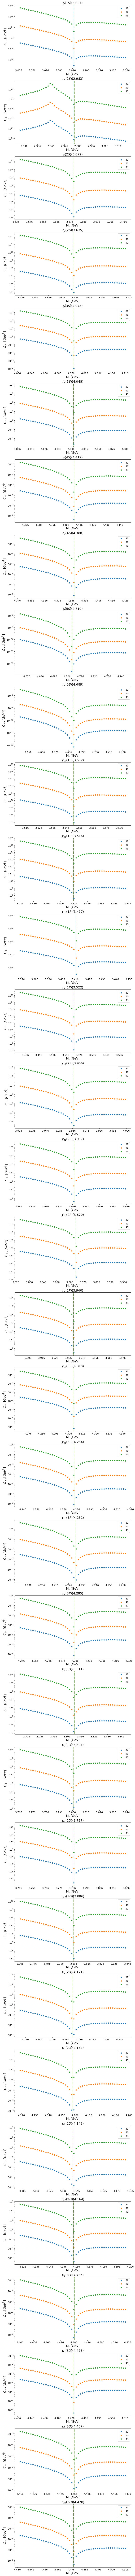

In [202]:
doPlots("c-lin", "lin")

In [210]:
printChecks("c-lin", "lin")

,Deviation from the highest cutoff [GeV]
cutscale,
37,-8.447140e-05
40,-2.428889e-07
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-3.801888e-04
40,6.705523e-07
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,9.473413e-08
40,4.135070e-09
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,4.189275e-07
40,-6.891799e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,4.300850e-08
40,9.309997e-11
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,2.063810e-08
40,-8.195000e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-3.315500e-09
40,2.607998e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,6.742800e-09
40,-4.098000e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-1.863001e-10
40,1.117000e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-8.941003e-10
40,-1.491001e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-7.783249e-07
40,-5.848710e-09
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-1.007952e-06
40,-6.593770e-09
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,1.736358e-06
40,-1.840293e-08
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,2.322942e-06
40,-4.023310e-09
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,8.208680e-08
40,-1.359700e-09
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,1.097098e-07
40,-1.154840e-09
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-1.193210e-07
40,-1.117499e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,6.444750e-09
40,1.676380e-09
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,5.252600e-09
40,-1.118001e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-8.196002e-10
40,3.725000e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,1.469630e-08
40,3.910996e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,9.555400e-09
40,-5.774001e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,2.315268e-08
40,-6.891800e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,2.419949e-07
40,3.576280e-09
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,3.308058e-08
40,-2.980201e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,6.910413e-08
40,2.346930e-09
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,2.514570e-08
40,1.118001e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,4.284100e-09
40,-4.843002e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-2.788380e-08
40,7.265000e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-1.821670e-08
40,-3.353000e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,-4.917400e-09
40,1.489999e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,9.871999e-10
40,-2.049001e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,4.098000e-10
40,-1.861999e-10
43,0.000000e+00


,Deviation from the highest cutoff [GeV]
cutscale,
37,2.123400e-09
40,3.720024e-11
43,0.000000e+00


In [15]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("c-lin", "lin"))

In [16]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
)\
.round({"dev(lin)": 3, "alldev(lin)": 3})

compiled = compiled[["exp", "8", "11", "LP", "my(lin)", "dev(lin)", "alldev(lin)"]]

In [17]:
compiled.sort_values("alldev(lin)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin)
name,,,,,,,
psi_2_3D,NaN,NaN,4327,4478,4477.968900,0.031,0.031
psi_3S,4040.0,4072.0,4022,4078,4078.040011,0.040,0.040
chi_c2_3P,NaN,4317.0,4208,4310,4309.960255,0.040,0.040
psi_1_1D,3778.0,3785.0,3787,3787,3787.063443,0.063,0.063
psi_1S,3097.0,3090.0,3097,3097,3097.084471,0.084,0.084
h_c_1P,3525.0,3516.0,3519,3522,3522.095333,0.095,0.095
chi_c2_1P,3556.0,3556.0,3554,3552,3551.796921,0.203,0.203
eta_c_4S,NaN,4384.0,4250,4388,4388.217088,0.217,0.217
h_c_2P,NaN,3934.0,3908,3940,3939.783471,0.217,0.217


## Screening

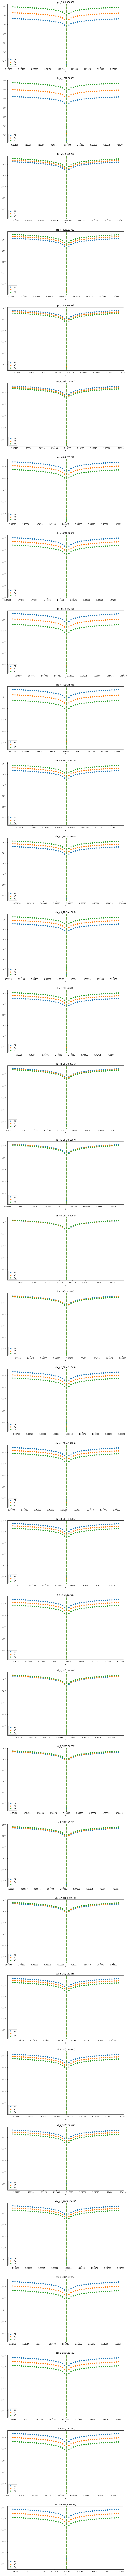

In [8]:
doPlots("c-scr", "scr")

In [171]:
printChecks("c-scr", "scr")

,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


,Deviation from the highest cutoff [GeV]
37,NaN
40,NaN
43,NaN


In [32]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("c-scr", "scr"))

In [33]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})

compiled = compiled[["exp", "8", "11", "SP", "my(scr)", "dev(scr)", "alldev(scr)"]]

In [34]:
compiled

,exp,8,11,SP,my(scr),dev(scr),alldev(scr)
name,,,,,,,
psi_1S,3097.0,3090.0,3097,3097,3096.857269,0.143,0.143
eta_c_1S,2984.0,2982.0,2979,2984,2983.987671,0.012,0.012
psi_2S,3686.0,3672.0,3673,3679,3678.974946,0.025,0.025
eta_c_2S,3639.0,3630.0,3623,3637,3637.321319,0.321,0.321
psi_3S,4040.0,4072.0,4022,4030,4029.680957,0.319,0.319
eta_c_3S,NaN,4043.0,3991,4004,4004.234364,0.234,0.234
psi_4S,4415.0,4406.0,4273,4281,4281.273656,0.274,0.274
eta_c_4S,NaN,4384.0,4250,4264,4263.618245,0.382,0.382
psi_5S,NaN,NaN,4463,4472,4471.423316,0.577,0.577


# Compiled charmonia

In [18]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("c-lin", "lin")).join(readMine("c-scr", "scr"))

In [19]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
).join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3, "alldev(lin)": 3, "dev(lin)": 3})

compiled = compiled.join(\
    compiled["dev(lin)"].add(compiled["dev(scr)"]).rename("dev(tot)")\
)\
.join(\
    compiled["alldev(lin)"].add(compiled["alldev(scr)"]).rename("alldev(tot)")\
)

compiled = compiled[["exp", "8", "11", "LP", "my(lin)", "dev(lin)", "alldev(lin)", "SP", "my(scr)", "dev(scr)", "alldev(scr)", "dev(tot)", "alldev(tot)"]]

In [20]:
compiled

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
psi_1S,3097.0,3090.0,3097,3097,3097.084471,0.084,0.084,3097,3096.857269,0.143,0.143,0.227,0.227
eta_c_1S,2984.0,2982.0,2979,2983,2983.380189,0.380,0.380,2984,2983.987671,0.012,0.012,0.392,0.392
psi_2S,3686.0,3672.0,3673,3679,3678.510403,0.490,0.465,3679,3678.974946,0.025,0.025,0.515,0.490
eta_c_2S,3639.0,3630.0,3623,3635,3634.528390,0.472,0.472,3637,3637.321319,0.321,0.321,0.793,0.793
psi_3S,4040.0,4072.0,4022,4078,4078.040011,0.040,0.040,4030,4029.680957,0.319,0.319,0.359,0.359
eta_c_3S,NaN,4043.0,3991,4048,4047.698046,0.302,0.302,4004,4004.234364,0.234,0.234,0.536,0.536
psi_4S,4415.0,4406.0,4273,4412,4412.252737,0.253,0.253,4281,4281.273656,0.274,0.274,0.527,0.527
eta_c_4S,NaN,4384.0,4250,4388,4388.217088,0.217,0.217,4264,4263.618245,0.382,0.382,0.599,0.599
psi_5S,NaN,NaN,4463,4711,4709.709493,1.291,1.291,4472,4471.423316,0.577,0.577,1.868,1.868


## description of columns
* my(lin), my(scr) - my results for linear and screened potential
* dev(lin), dev(scr) - deviation of my results from those represented in paper
* alldev(lin), alldev(scr) - minimum among deviations from: exp, 8, 11, LP(SP). columns shown in the article
* dev(tot) = dev(lin) + dev(scr)
* alldev(tot) = alldev(lin) + alldev(scr)

In [22]:
compiled.sort_values("alldev(tot)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
psi_1S,3097.0,3090.0,3097,3097,3097.084471,0.084,0.084,3097,3096.857269,0.143,0.143,0.227,0.227
h_c_1P,3525.0,3516.0,3519,3522,3522.095333,0.095,0.095,3526,3526.158223,0.158,0.158,0.253,0.253
h_c_2P,NaN,3934.0,3908,3940,3939.783471,0.217,0.217,3916,3915.939766,0.060,0.060,0.277,0.277
eta_c2_3D,NaN,NaN,4326,4478,4477.700687,0.299,0.299,4336,4335.984810,0.015,0.015,0.314,0.314
chi_c1_3P,NaN,4271.0,4178,4284,4284.267869,0.268,0.268,4192,4192.051130,0.051,0.051,0.319,0.319
chi_c0_1P,3415.0,3424.0,3433,3415,3416.692600,1.693,0.168,3415,3416.860923,1.861,0.168,3.554,0.336
chi_c2_1P,3556.0,3556.0,3554,3552,3551.796921,0.203,0.203,3553,3553.151266,0.151,0.151,0.354,0.354
psi_3S,4040.0,4072.0,4022,4078,4078.040011,0.040,0.040,4030,4029.680957,0.319,0.319,0.359,0.359
psi_1_1D,3778.0,3785.0,3787,3787,3787.063443,0.063,0.063,3792,3792.310219,0.310,0.310,0.373,0.373


In [23]:
compiled.sort_values("dev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
psi_2_1D,3823.0,3800.0,3798,3807,3806.545656,0.454,0.454,3807,3807.004275,0.004,0.004,0.458,0.458
eta_c_1S,2984.0,2982.0,2979,2983,2983.380189,0.380,0.380,2984,2983.987671,0.012,0.012,0.392,0.392
eta_c2_3D,NaN,NaN,4326,4478,4477.700687,0.299,0.299,4336,4335.984810,0.015,0.015,0.314,0.314
psi_2S,3686.0,3672.0,3673,3679,3678.510403,0.490,0.465,3679,3678.974946,0.025,0.025,0.515,0.490
chi_c1_3P,NaN,4271.0,4178,4284,4284.267869,0.268,0.268,4192,4192.051130,0.051,0.051,0.319,0.319
h_c_2P,NaN,3934.0,3908,3940,3939.783471,0.217,0.217,3916,3915.939766,0.060,0.060,0.277,0.277
eta_c2_1D,NaN,3799.0,3796,3806,3805.659355,0.341,0.341,3805,3805.109514,0.110,0.110,0.451,0.451
psi_1_3D,NaN,NaN,4317,4456,4456.670518,0.671,0.671,4324,4324.120233,0.120,0.120,0.791,0.791
chi_c1_2P,NaN,3925.0,3901,3937,3937.283856,0.284,0.284,3914,3913.873318,0.127,0.127,0.411,0.411


In [24]:
compiled.sort_values("alldev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
psi_2_1D,3823.0,3800.0,3798,3807,3806.545656,0.454,0.454,3807,3807.004275,0.004,0.004,0.458,0.458
eta_c_1S,2984.0,2982.0,2979,2983,2983.380189,0.380,0.380,2984,2983.987671,0.012,0.012,0.392,0.392
eta_c2_3D,NaN,NaN,4326,4478,4477.700687,0.299,0.299,4336,4335.984810,0.015,0.015,0.314,0.314
psi_2S,3686.0,3672.0,3673,3679,3678.510403,0.490,0.465,3679,3678.974946,0.025,0.025,0.515,0.490
chi_c1_3P,NaN,4271.0,4178,4284,4284.267869,0.268,0.268,4192,4192.051130,0.051,0.051,0.319,0.319
h_c_2P,NaN,3934.0,3908,3940,3939.783471,0.217,0.217,3916,3915.939766,0.060,0.060,0.277,0.277
eta_c2_1D,NaN,3799.0,3796,3806,3805.659355,0.341,0.341,3805,3805.109514,0.110,0.110,0.451,0.451
psi_1_3D,NaN,NaN,4317,4456,4456.670518,0.671,0.671,4324,4324.120233,0.120,0.120,0.791,0.791
chi_c1_2P,NaN,3925.0,3901,3937,3937.283856,0.284,0.284,3914,3913.873318,0.127,0.127,0.411,0.411


# Bottomonium

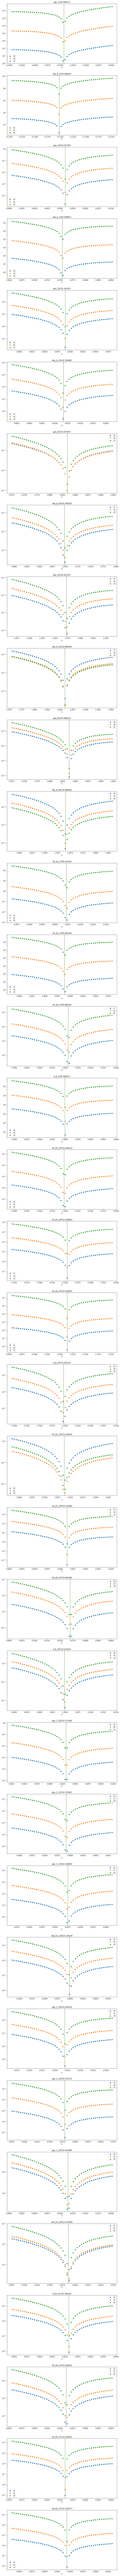

In [25]:
doPlots("b-scr", "scr")

In [26]:
printCheck("b-scr", "scr")

yps_1S(-0.05422891708379499)
peaks - peaks[-1]
                     E
cutscale              
18        1.206971e-07
20        2.956940e-10
22        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
18                 NaN
20       -1.204014e-07
22       -2.956940e-10

---

eta_b_1S(-0.12516301551424)
peaks - peaks[-1]
                     E
cutscale              
12        1.296764e-06
15       -2.328300e-10
18        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
12                 NaN
15       -1.296997e-06
18        2.328300e-10

---

yps_2S(0.50105318322023)
peaks - peaks[-1]
                     E
cutscale              
14        1.327201e-10
16       -1.628997e-11
18        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
16       -1.490100e-10
18        1.628997e-11

---

eta_b_2S(0.47546964325421004)
peaks - peaks[-1]
                     E
cutscale           

In [10]:
article = pd.read_csv("../data/b-spectrum.csv", index_col=0)
res = article.join(readMine("b-scr", "scr"))

In [11]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})

compiled = compiled[["PDG", "SNR", "GI", "NR", "SP", "my(scr)", "dev(scr)", "alldev(scr)"]]

In [16]:
compiled

,PDG,SNR,GI,NR,SP,my(scr),dev(scr),alldev(scr)
name,,,,,,,,
yps_1S,9.46e+03,9.46e+03,9465,9.5e+03,9460,9.46e+03,0.171,0.171
eta_b_1S,9.4e+03,9.39e+03,9402,9.46e+03,9390,9.39e+03,0.763,0.237
yps_2S,1e+04,1e+04,10003,1e+04,10015,1e+04,0.453,0.453
eta_b_2S,1e+04,9.99e+03,9976,9.99e+03,9990,9.99e+03,0.13,0.13
yps_3S,1.04e+04,1.04e+04,10354,1.03e+04,10343,1.03e+04,0.432,0.432
eta_b_3S,nan,1.03e+04,10336,1.03e+04,10326,1.03e+04,0.077,0.077
yps_4S,1.06e+04,1.06e+04,10635,1.06e+04,10597,1.06e+04,0.87,0.87
eta_b_4S,nan,1.06e+04,10623,nan,10584,1.06e+04,0.281,0.281
yps_5S,1.09e+04,1.08e+04,10878,1.08e+04,10811,1.08e+04,0.671,0.671


## description of columns
* my(scr) - my results for screened potential
* dev(scr) - deviation of my results from those represented in paper
* alldev(scr) - minimum among deviations from: PDG, SNR, GI, NR, SP; columns shown in the article

In [30]:
compiled.sort_values("alldev(scr)")

,PDG,SNR,GI,NR,SP,my(scr),dev(scr),alldev(scr)
name,,,,,,,,
chi_b0_1P,9859.0,9865.0,9847,9855.0,9864,9865.026207,1.026,0.026
eta_b_3S,NaN,10330.0,10336,10330.0,10326,10326.077418,0.077,0.077
h_b_2P,10260.0,10256.0,10250,10240.0,10254,10254.130289,0.130,0.130
eta_b_2S,9999.0,9987.0,9976,9990.0,9990,9989.869643,0.130,0.130
chi_b0_2P,10233.0,10226.0,10226,10221.0,10220,10220.830785,0.831,0.169
yps_1S,9460.0,9460.0,9465,9502.0,9460,9460.171083,0.171,0.171
chi_b2_2P,10269.0,10269.0,10261,10264.0,10264,10264.217292,0.217,0.217
eta_b_1S,9398.0,9389.0,9402,9455.0,9390,9389.236984,0.763,0.237
chi_b2_3P,NaN,10540.0,10550,10521.0,10528,10528.239041,0.239,0.239


# Output for thesis

## Dip for $\chi_{b0}(1P)$

,Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$],
8,7.543720e-09
10,1.863004e-11
12,0.000000e+00


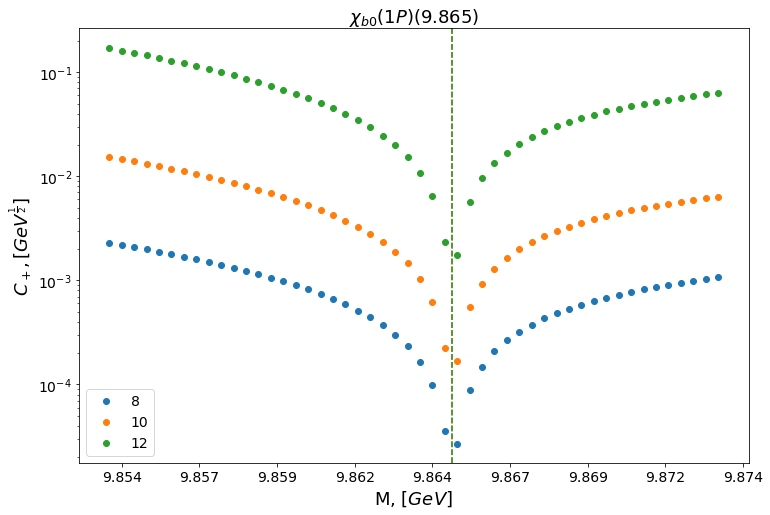

In [223]:
plotParticle(plt.gca(), "chi_b0_1P", "b-scr", "scr")
plt.savefig("export/chi_b0_1P-dip.eps")
with open("export/chi_b0_1P-dipcheck.tex", "w") as f:
    display(printCheck("chi_b0_1P", "b-scr", "scr"))
    f.write(printCheck("chi_b0_1P", "b-scr", "scr").to_latex(escape=False, column_format="lc"))

## Dip for $\chi_{c0}(1P)$

,Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$],
37,0.0
40,0.0
43,0.0


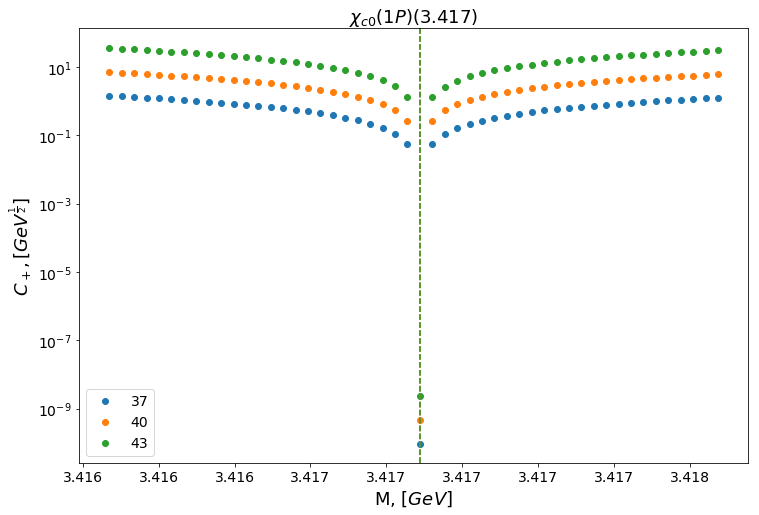

In [224]:
plotParticle(plt.gca(), "chi_c0_1P", "c-scr", "scr")
plt.savefig("export/chi_c0_1P-dip.eps")
with open("export/chi_c0_1P-dipcheck.tex", "w") as f:
    display(printCheck("chi_c0_1P", "c-scr", "scr"))
    f.write(printCheck("chi_c0_1P", "c-scr", "scr").to_latex(escape=False, column_format="lc"))

## Dip for $\chi_{c0}(1P)$ in linear potential

,Deviation from the highest cutoff [$GeV$]
Cutscale [$GeV^{-1}$],
37,1.736358e-06
40,-1.840293e-08
43,0.000000e+00


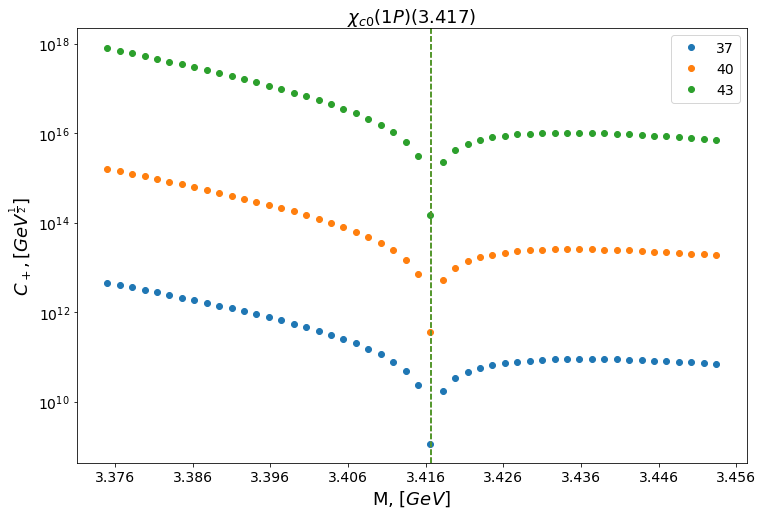

In [222]:
plotParticle(plt.gca(), "chi_c0_1P", "c-lin", "lin")
plt.savefig("export/chi_c0_1P-lin-dip.eps")
with open("export/chi_c0_1P-lin-dipcheck.tex", "w") as f:
    display(printCheck("chi_c0_1P", "c-lin", "lin"))
    f.write(printCheck("chi_c0_1P", "c-lin", "lin").to_latex(escape=False, column_format="lc"))

## Bottomonium Spectrum. Screened

In [268]:
compiled = pd.read_csv("../data/bottomonia.csv", index_col=0)
compiled = compiled.join(readMine("b-scr", "scr"))[["PDG", "SP", "my(scr)"]]
compiled.columns = ["PDG", "Deng", "Our"]
compiled.index = pd.Index(["${}$".format(code2name(v)) for v in compiled.index.values], name="States")
compiled = compiled.round({"PDG": 0, 'Our': 2})
print("Our std: {}".format(compiled["PDG"].subtract(compiled["Our"]).std()))
print("Deng std: {}".format(compiled["PDG"].subtract(compiled["Deng"]).std()))
compiled['PDG'] = compiled['PDG'].map(lambda num: '{:g}'.format(num) if not np.isnan(num) else "—")
display(compiled)

with open("export/bot-spectr.tex", "w") as f:
    f.write(compiled.to_latex(escape=False, column_format="lccc", na_rep="—"))

Our std: 20.29070875461741
Deng std: 20.25717011767613


,PDG,Deng,Our
States,,,
$\Upsilon(1S)$,9460,9460,9460.17
$\eta_{b}(1S)$,9398,9390,9389.24
$\Upsilon(2S)$,10023,10015,10015.45
$\eta_{b}(2S)$,9999,9990,9989.87
$\Upsilon(3S)$,10355,10343,10343.43
$\eta_{b}(3S)$,—,10326,10326.08
$\Upsilon(4S)$,10579,10597,10597.87
$\eta_{b}(4S)$,—,10584,10584.28
$\Upsilon(5S)$,10889,10811,10811.67


## Charmonium spectrum. Screened

In [270]:
compiled = pd.read_csv("../data/charmonia.csv", index_col=0)
compiled = compiled.join(readMine("c-scr", "scr"))[["PDG", "SP", "my(scr)"]]
compiled.columns = ["PDG", "Deng", "Our"]
compiled.index = pd.Index(["${}$".format(code2name(v)) for v in compiled.index.values], name="States")
compiled = compiled.round({"PDG": 0, 'Our': 2})
print("Our std: {}".format(compiled["PDG"].subtract(compiled["Our"]).std()))
print("Deng std: {}".format(compiled["PDG"].subtract(compiled["Deng"]).std()))
compiled['PDG'] = compiled['PDG'].map(lambda num: '{:g}'.format(num) if not np.isnan(num) else "—")
display(compiled)

with open("export/charm-spectr.tex", "w") as f:
    f.write(compiled.to_latex(escape=False, column_format="lccc", na_rep="—"))

Our std: 43.64861995309265
Deng std: 43.725115371897125


,PDG,Deng,Our
States,,,
$\psi(1S)$,3097,3097,3096.86
$\eta_{c}(1S)$,2984,2984,2983.99
$\psi(2S)$,3686,3679,3678.97
$\eta_{c}(2S)$,3639,3637,3637.32
$\psi(3S)$,4040,4030,4029.68
$\eta_{c}(3S)$,—,4004,4004.23
$\psi(4S)$,4415,4281,4281.27
$\eta_{c}(4S)$,—,4264,4263.62
$\psi(5S)$,—,4472,4471.42


## Charmonium spectrum. Linear

In [271]:
compiled = pd.read_csv("../data/charmonia.csv", index_col=0)
compiled = compiled.join(readMine("c-lin", "lin"))[["PDG", "LP", "my(lin)"]]
compiled.columns = ["PDG", "Deng", "Our"]
compiled.index = pd.Index(["${}$".format(code2name(v)) for v in compiled.index.values], name="States")
compiled = compiled.round({"PDG": 0, 'Our': 2})
print("Our std: {}".format(compiled["PDG"].subtract(compiled["Our"]).std()))
print("Deng std: {}".format(compiled["PDG"].subtract(compiled["Deng"]).std()))
compiled['PDG'] = compiled['PDG'].map(lambda num: '{:g}'.format(num) if not np.isnan(num) else "—")
display(compiled)

with open("export/charm-spectr-lin.tex", "w") as f:
    f.write(compiled.to_latex(escape=False, column_format="lccc", na_rep="—"))

Our std: 23.77136833211232
Deng std: 23.902181609934388


,PDG,Deng,Our
States,,,
$\psi(1S)$,3097,3097,3097.08
$\eta_{c}(1S)$,2984,2983,2983.38
$\psi(2S)$,3686,3679,3678.51
$\eta_{c}(2S)$,3639,3635,3634.53
$\psi(3S)$,4040,4078,4078.04
$\eta_{c}(3S)$,—,4048,4047.70
$\psi(4S)$,4415,4412,4412.25
$\eta_{c}(4S)$,—,4388,4388.22
$\psi(5S)$,—,4711,4709.71
